# Proyecto 2: Clasificación de Texto

Equipo Séú Séú Pu+

Integrantes:



*   Ana Cristina Cuevas García
*   Derek Saul Morán Pérez
*   Emiliano Vicaña Garcia

En la actualidad, las redes sociales desempeñan un papel fundamental en nuestras interacciones sociales y en cómo nos relacionamos. Sin embargo, un efecto secundario de esto es la propagación de ideologías, opiniones e información en general.

Según un artículo de la BBC que cita un estudio, durante la pandemia(2019-2021) y en años posteriores, los discursos de odio en redes sociales aumentaron un 20\%, al igual que el acoso cibernético. Estos efectos se ven exacerbados durante eventos importantes.

Nuestro objetivo es desarrollar un sistema capaz de detectar mensajes de odio y poder clasificarlo en diversas categorías.

## **1.-** Adquisición de los Datos

Para resolver este problema nos propusimos aplicar un modelo de clasificación multiclase de texto para 6 categorías:


1.   No Odio: mensajes que no son de odio
2.   Sexismo: mensajes de odio basados en discriminación sexual
3.   Racismo: mensajes de odio en base a la raza de las personas
4.   Religion: mensajes de odio en base a la religion que profesan
5.   Orientacion: mensajes de odio en base a la orientación sexual de las personas
6.   Origen: mensajes de odio en base al lugar de donde provienen las personas (xenofobia)

Ya una vez que definimos el problema nos debemos enfrentar a la búsqueda de los datos:

Para poder encontrar los datos nos enfrentamos a varias situaciones, la primera fue intentar encontrar datos en español, puesto que la información que contenga esta información está muy limitada a tener pocos datos, y en su mayoría sólo estaban etiquetadas en si eran de odio o no, es decir, una clasificación binaria. Pero nuestro propósito es realiar una clasificación multiclase para 6 categorías, por lo que intentamos hablar con alguna IA de procesamiento de lenguaje para que nos dé información, pero estas se rechazan a darnos mensajes de odio ya que estas están programadas para evitar este tipo de comentarios.

 Pero BING nos ofreció bases de datos en inglés que tienen muchos datos, así que decidimos tomar varias bases de datos de diversas categorías y juntarlas todas en una misma base de datos.

 Algunas de las bases que tomamos son:


*   https://www.kaggle.com/competitions/jigsaw-unintended-bias-in-toxicity-classification/data?select=train.csv
*   https://www.kaggle.com/datasets/victorcallejasf/multimodal-hate-speech/data   
*   https://www.kaggle.com/datasets/rahulgoel1106/xenophobia-on-twitter-during-covid19/data
*   https://www.kaggle.com/datasets/gbiamgaurav/cyberbullying-detection
*   https://www.kaggle.com/datasets/smmmmmmmmmmmm/twitter-data
*   https://www.kaggle.com/datasets/staru09/twitter-parsed-full-data

Después de nuestra mezcla de datos, conseguimos tener la siguiente cantidad de datos para las diversas categorías:

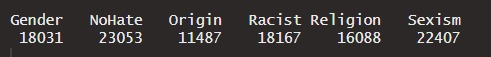




Tuvimos los siguientes registros de mensajes de odio en las categorías:

18K para Género (también entendido como orientación sexual e identidad de género, a esta categoría le cambiaremos el nombre por "Orientación")

23K para No Odio

11K para Origen

18K para Racismo

16K para Religion

22K para Sexismo

Como podemos ver, los datos están un poco desbalanceados, teniendo 22K datos para la categoría más repetida y 11K para la categoría con menos imputaciones, esto puede causar algunos problemas con el modelo a la hora de dividir en train y test.

Debido a esto nosotros tomamos la decisión de tomar 10,000 datos de cada una de las categorías, para tener una base balanceada y aún mantener una gran cantidad considerable de datos que nos podrán ayudar a hacer un buen modelo.

A su vez, la decisión de tomar sólo 10,000 datos de cada una es porque nuestra base de datos está en inglés, y nosotros necesitamos la base en español, es por esto que tomamos la decisión de traducir la base de datos usando la función Translator de la paquetería gtrans, este código viene en el siguiente bloque, está comentado de forma que no va a compilarse, y no es necesario, puesto que la base ya traducida también fue colocada debajo, de esta forma se pueden evitar el tener que traducirla, puesto que esta traducción tarda al rededor de 2 horas


##### Taducción de la Base de Datos

In [ ]:
#convertir nuestro df mensajeodio.csv a UTF-8
#
# !iconv -f ISO-8859-1 -t UTF-8 /content/drive/MyDrive/CC/Mensajes\ de\ odio/mensajeodio.csv > /content/drive/MyDrive/CC/Mensajes\ de\ odio/mensajeodioUTF8.csv
#

In [ ]:
#show mensajedeodioUTF8.csv

# from google.colab import files

# Download the file from Google Drive
# files.download("/content/drive/MyDrive/CC/Mensajes de odio/mensajeodioUTF8.csv")

In [ ]:
# import pandas as pd

# df = pd.read_csv("/content/drive/MyDrive/CC/Mensajes de odio/mensajeodioUTF8.csv")

# Print the first few rows of the DataFrame
# print(df.head())



In [ ]:
# df.info()

In [ ]:
# !pip install googletrans==3.1.0a0

In [ ]:
# import googletrans
# from googletrans import Translator
# import pandas as pd


In [ ]:
# translator = Translator
# df_en = pd.read_csv("/content/drive/MyDrive/CC/Mensajes de odio/mensajeodioUTF8.csv")


In [ ]:
# df_en.head()

In [ ]:
# !pip install googletrans
# from googletrans import Translator

## Create a translator object.
# translator = Translator()

## Rename columns in df_es using translated column names.
# df_es = df_en.copy()
# df_es.rename(columns=lambda x: translator.translate(x, dest='es').text, inplace=True)

## Print the columns of df_es.
# df_es.columns

In [ ]:
# df_es.head()

In [ ]:
# !pip install googletrans
# from googletrans import Translator

# Create a translator object.
# translator = Translator()

# Translate the entire df_en DataFrame to Spanish.
# df_es = df_en.copy()
## for column in df_es.columns:
#df_es[column] = df_es[column].apply(lambda x: translator.translate(x, dest='es').text)

# Print the translated DataFrame.
# df_es

In [ ]:
# df_es.to_csv('df_es.csv', index=False)

In [ ]:
# from google.colab import files

## Save the translated DataFrame to a CSV file.
#df_es.to_csv('df_es.csv', index=False)

## Download the CSV file.
# files.download('df_es.csv')

## **2.-** Preprocesamiento de Datos

En esta parte se encuentra ya importada la base de datos en español, después de modificar algunos datos que no leyeron bien los acentos, esto lo hicimos con OpenRefine, por lo que los pasos no se encuentran aquí.

In [ ]:
#tenemos que importar la librería chardet, ya qye esta nos permite conocer que tipo de codificación tienen los datos, si UTF-8 o de cual se trata
!pip install chardet

In [ ]:
#para acceder a la base en drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pandas y chardet para leer la base y la codificación
import pandas as pd
import chardet

In [ ]:
with open("/content/drive/MyDrive/CC/mensajes de odio/odioesp.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
    #verificamos que codificación tiene la base para poder cargarla exitosamente :D

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CC/mensajes de odio/odioesp.csv", encoding=encoding)
#importar la base de datos

In [ ]:
df = df.drop(columns=['Unnamed: 2'])

df.head()
#ver los primeros registros

,text,target
0,"Vete a la mierda, vete a la mierda, estupida p...",Sexismo
1,Siempre pense que la vida en el modo tutorial ...,Sexismo
2,La dama de atras parpadea cuando se enciende l...,Sexismo
3,"Cuidado con lo que deseas, siempre quisiste se...",Sexismo
4,"a las 7:19 es por lo que odio a la gente, espe...",Sexismo


In [ ]:
df.info()
#ver la cantidad de datos que tenemos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    49378 non-null  object
 1   target  49378 non-null  object
dtypes: object(2)
memory usage: 937.6+ KB


Podemos observar que el DF detecta 60,000 entradas, puesto que nosotros tomamos 10,000 imputaciones de cada una de las 6 características, pero al manipular los datos en OpenRefine nos dimos cuenta que la base de datos tiene muchos duplicados en algunas categorías, así que las vamos a retirar, ya que se puede sesgar la información si la mayoría de las repeticiones entran en la división de train, y en caso de que varias caigan en la categoría de test, vamos a tener un sobreajuste de los datos, ya que estos se van a poder clasificar muy bien, pero puede tener problemas con clasificar los demás, así que debemos quitarlos para evitar problemas, una vez retiradas las duplicaciones obtenemos la siguiente cantidad de datos:

In [ ]:
#quitar duplciados en la columna text
df.drop_duplicates(subset="text", inplace=True)

#quitar los posibles valores na
df = df.dropna(subset=['text'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49378 entries, 0 to 49377
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    49378 non-null  object
 1   target  49378 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


Ya sin duplicados y sin posibles valores NA, tenemos 49378 entradas de datos, divididos en la siguiente cantidad para cada categoría:



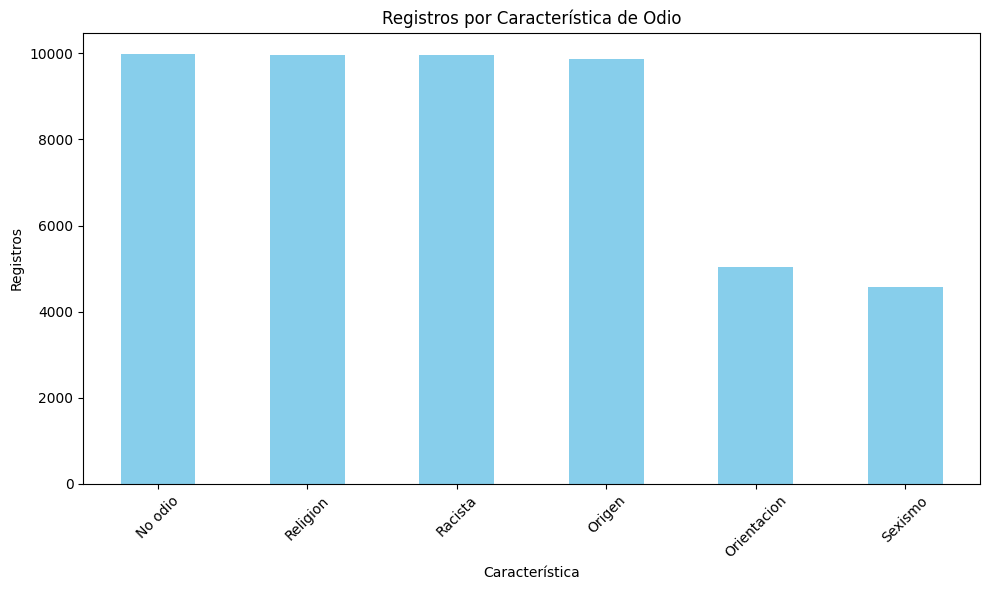

In [ ]:
import matplotlib.pyplot as plt

#cantidad de registros para cada característica que tenemos
conteo_caracteristicas = df['target'].value_counts()

#grafica
plt.figure(figsize=(10, 6))
conteo_caracteristicas.plot(kind='bar', color='skyblue')
plt.title('Registros por Característica de Odio')
plt.xlabel('Característica')
plt.ylabel('Registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Una vez sin duplicados podemos ver que tenemos aproximadamente 10K entradas de datos para cada categoría, excepto para la de Orientación y Sexismo, como la diferencia entre las categorías no es tan grande como en otros casos, mantendremos así los datos para hacer el modelo, aunque intentamos hacer un data augmentation que no funcionó como esperábamos.

### Extracción de características:

Primero vamos a pasar todo el texto a minúsclas, puesto que ya quitamos acentos y símbolos que no pertenecen al idioma inglés, los cuales podrían haber causado algunos problemas en el dataframe al momento de hacer el modelo.

In [ ]:
df['text'] = df['text'].str.lower()

Ahora, en nuestro caso nuetra columna de texto algunas veces tiene @user, ya que es un retwit o respuesta a alguna persona, por lo que quitaremos estos caracteres.

In [ ]:
import re

#funcion que detecta y elimina en el texto cualquier @user, es decir, detecta el símbolo @, y se dedica a eliminar el texto hasta encontrar el primer espacio
#asi si se encuentra algo como "@bebexitomoxito hola bb" se quedará únicamente el "hola bb"
def remove_user_mentions(text):
    return re.sub(r'@\S+', '', text)

#Aplicar la función a la columna 'text'
df['text'] = df['text'].apply(remove_user_mentions)

Parte de manejar estos datos es también quitar los números, puesto que no suelen aportar mucho a la información en realidad, los números pueden hacer referencias a fechas, pero no por esto indica que una fecha indique que todo ese año es por racismo o así, por lo que también quitaremos los números

In [ ]:
#función para quitar los números y remplazarlos por nada, un vacio, esto puesto que los números no nos van a dar mucha información
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

#aplicar la función a la columna
df['text'] = df['text'].apply(remove_numbers)
print(df['text'])

0        vete a la mierda, vete a la mierda, estupida p...
1        siempre pense que la vida en el modo tutorial ...
2        la dama de atras parpadea cuando se enciende l...
3        cuidado con lo que deseas, siempre quisiste se...
4        a las : es por lo que odio a la gente, especia...
                               ...                        
49373    quitate la polla y las pelotas de la boca, sod...
49374    supongo que estara en chicago, donde el orgull...
49375    ser lesbiana no cambia el hecho de que sigo si...
49376     malditos cobardes degenerados, apuesto que si...
49377    los arabes tienen razon al quitarle el derecho...
Name: text, Length: 49378, dtype: object


Hay otras cosas varias que debemos hacer, para evitar tener que estar haciendo celdas y celdas de código, juntaremos todo en una función clave que hará varias cosas:

.- Tokenización: esto dividirá el texto en palabras individuales, para así analizar cada palabra

.- Eliminar palabras de conjunción: son las palabras como "la, el, tu, de, y, o" que son palabras que en realidad no aportan mucho significado al texto, puesto que nos interesa más identificar palabras claves en los textos de odio.

.- Parte de la limpieza de texto también es eliminar signos de puntuación, como símbolos de pregunta, de admiración, puntos, comas, doble punto, etc. Ya que si tenemos muchas comas en la categoría de Genero, por ejemplo, el programa pensará que este símbolo de puntuación es una palabra de odio, por lo que no es útil.

.- Lematizar las palabras, esto lo que hace es reducir las palabras a su forma base, para determinar la forma de una palabra, por ejemplo, para algunos verbos como "Corriendo, correr, corren, corrió" se transforma sólo en la palabra "Corre", que esto lo puede identificar de mejor manera el programa.

.- Stemming: mientras que la lematización reduce las palabras a una forma base, el stemming lo reduce a la raíz de la palabra, es decir, la lematización lo pasa a un estado base, pero el stemming además quita los sufijos, el stemming corta los extremos de la palabra para obtener su raiz, por ejemplo, ya una vez que se lematizó el verbo de correr, ahora el stemming lo pasaría a corr, palabra que nosotros no entendemos realmente y no tiene un significado, pero la computadora lo puede entender mejor, puesto que estamos haciendo la palabra cada vez más sencilla de entender.

.- Por último, vamos a convertir el texto en vectores numéricos, ya que los algoritmos de aprendizaje, y sobre todo una computadora, únicamente entiende números, nosotros usaremos TF-IDF, técnica que se encarga de ponderar la importancia de una palabra en un documento dentro de una colección de documentos, lo que nos permite representar la relevacnia de un término en un documento. Se reconoce como un término importante si aparece con frecuencia en el documento, y es menos importante si aparece en muchos otros documentos.

Ejemplo:
Veamos un ejemplo para entenderlo mejor:

Supongamos que tenemos un corpus compuesto por tres documentos:

"El gato está sobre la mesa"

"La mesa está en la cocina"

"El perro está bajo la mesa"

Calcularemos el TF-IDF para la palabra "mesa" en cada uno de los documentos.

Para el texto 1:

TF("mesa", Documento 1) = 1 (aparece una vez)

IDF("mesa") = log(3 / 3) = log(1) = 0

TF-IDF("mesa", Documento 1) = 1 * 0 = 0

Para el texto 2:

TF("mesa", Documento 2) = 1 (aparece una vez)

IDF("mesa") = log(3 / 3) = log(1) = 0

TF-IDF("mesa", Documento 2) = 1 * 0 = 0

Para el texto 3:

TF("mesa", Documento 3) = 1 (aparece una vez)

IDF("mesa") = log(3 / 3) = log(1) = 0

TF-IDF("mesa", Documento 3) = 1 * 0 = 0

Como se puede observar, el TF-IDF para la palabra "mesa" es 0 en todos los documentos porque aparece en todos los documentos del corpus y, por lo tanto, su IDF es 0. Esto significa que la palabra "mesa" no aporta mucha información discriminatoria en este caso. Mientras que las palabras como perro o gato pueden aportar más a la información.

In [ ]:
"""
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

#neecitamos algunos recursos que nos servirán para identificar simbolos o palabras conectoras
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#función que hace un prepprocesamiento del texto según lo que nosotros necesitamos, haciendo las cosas ya especificadas anteriormente
def preprocess_text(text):
    #primero haremos tokens, usando la columna texto y dando a entender que hablamos del idioma español, esto lo reconoce por los recursos instalados arriba
    tokens = word_tokenize(text, language='spanish')

    #stopword se refiere a las palabras conectoras antes definidas, este pedazo de código se encarga de eliminar estas palabras que se identificaron en
    #el idioma español, además, se van a eliminar las palabras de longitud 1, que serían vocales y consonantes que no tienen más contenido para brindar información
    #como: y, o, e, a, y posibles errores tipográficos
    stop_words = set(stopwords.words('spanish'))
    tokens = [word for word in tokens if word.lower() not in stop_words and len(word) > 1]

    #vamos a eliminar también palabras o símbolos especiales, como acentos, puntuación, etc, basándonos en el código ASCII, realmente ya hcimos parte de esto cuando
    #limpiamos la base traducida, pero en este caso vamos a quitar también los símbolos de puntuación
    clean_tokens = []
    for token in tokens:
        clean_token = re.sub(r'[^a-zA-ZÀ-ÿ]', ' ', token)
        clean_token = unicodedata.normalize('NFKD', clean_token).encode('ASCII', 'ignore').decode('utf-8', 'ignore')
        clean_tokens.append(clean_token)

    #esto hace el proceso de lematización definido antes, el cual devuelve una palabra a su estado base, por ejemplo, en el idioma español por ejemplo, los verbos
    #correr, corriendo, corrió etc se devolverían a "correr" simplificando así el texto y el proceso de entendimiento al programa
    lemmatizer = WordNetLemmatizer()
    #lo que se lematiza en este casos son los tokens

    tokens = [lemmatizer.lemmatize(token) for token in clean_tokens]
    #Stemming mientras que la lematización reduce las palabras a una forma base, el stemming lo reduce a la raíz de la palabra, es decir, la lematización lo pasa a un
    #estado base, pero el stemming además quita los sufijos, el stemming corta los extremos de la palabra para obtener su raiz, por ejemplo, ya una vez que se lematizó
    #el verbo de correr, ahora el stemming lo pasaría a corr, palabra que nosotros no entendemos realmente, no tiene un significado, pero la computadora lo puede entender
    #mejor, puesto que estamos haciendo la palabra cada vez más sencilla de entender, y esto lo entenderá mejor
    stemmer = SnowballStemmer('spanish')
    tokens = [stemmer.stem(token) for token in tokens]

    #por último devolvemos los tokens
    return ' '.join(tokens)

#Aplicamos la función de preprocess text que se encarga de hacer un preprocesamiento a la columna de texto, y lo asignamos a una columna nueva llamada
#preprocess_text, que será la columna que usaremos para la clasificación y creación de los modelos
df['text_preprocessed'] = df['text'].apply(preprocess_text)

##########Vectorización de texto utilizando TF-IDF#################
#por último, vamos a hacer la vectorización de texto usando TF-IDF_ term Frequency-Inverse Document Frequency, el cual tiene en cuenta
#la aparición de una palabra en un documento y su importancia de la palabra en el corpus de documentos
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text_preprocessed'])

#Obtenemos los nombres de las características
feature_names = vectorizer.get_feature_names_out()
"""


"\nimport unicodedata\nimport nltk\nfrom nltk.corpus import stopwords\nfrom nltk.tokenize import word_tokenize\nfrom nltk.stem import SnowballStemmer\nfrom nltk.stem import WordNetLemmatizer\nfrom sklearn.feature_extraction.text import TfidfVectorizer\n\n#neecitamos algunos recursos que nos servirán para identificar simbolos o palabras conectoras\nnltk.download('punkt')\nnltk.download('stopwords')\nnltk.download('wordnet')\n\n#función que ahce un prepprocesamiento del texto según lo que nosotros necesitamos\ndef preprocess_text(text):\n    #primero haremos tokens, usando la columna texto y dando a entender que hablamos del idioma español, esto lo reconoce por los recursos instalados arriba\n    tokens = word_tokenize(text, language='spanish')\n\n    #stopword se refiere a las palabras conectoras antes definidas, este pedazo de código se encarga de eliminar estas palabras que se identificaron en\n    #el idioma español, además, se van a eliminar las palabras de longitud 1, que serían vo

(Esta celda de código ha sido "silenciada" para que no sea necesario correrla, como el caso de la traducción, la base con los datos ya procesados se encuentra en el .zip de entrega en el documento Odioesptrabajado.csv)

## **3.-** Seleccionar un modelo de clasificación en base a diagramas de dispersión, curvas de distribución u otras técnicas

##### PCA



En nuestro caso, como tenemos una clasifiación multimodal, vamos a usar PCA para ver si se puede visualizar una separación clara entre las clases que tenemos.

El resultado fue el siguiente:

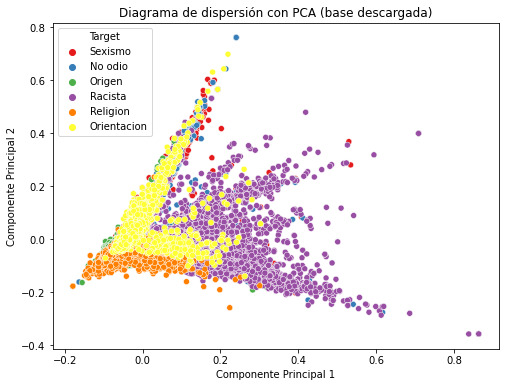

Podemos ver que no se nota una gran diferencia en varios de los puntos, pero hay algunos que se alejan del conjunto de puntos, esto puede ser porque tienen palabras que los hacen diferenciarse de los demás.

In [ ]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


with open("Odioesptrabajado.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
    #verificamos que codificación tiene la base para poder cargarla exitosamente 😄

#importamos la base de datos que necesitamos, en este caso, la base traducida y procesada
df = pd.read_csv('Odioesptrabajado.csv',encoding=encoding )

#retiramos los posibles na
df = df.dropna(subset=['text_preprocessed'])

#cargamos la variable x como la vectorización de los datos de texto procesado
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text_preprocessed'])

#tomamos el pca con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

#plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['target'], palette='Set1')
plt.title('Diagrama de dispersión con PCA (base descargada)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Target')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Odioesptrabajado.csv'

##### Análisis de Frecuencia de Palabras

Este análisis realiza un conteo de las frecuencias de las palabras que aparecen en caada clase de la variable objetivo, lo que puede servir para identificar algunos patrones sobre las palabras que aparecen más veces en dichas categorías, esto nos peude servir para conocer si hay alguna diferencia clave entre las palabras con mayor aparición por palabra, lo que terminaría ayudándonos a escoger algún tipo de clasificador.

In [ ]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud


with open("Odioesptrabajado.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
    #verificamos que codificación tiene la base para poder cargarla exitosamente

df = pd.read_csv('Odioesptrabajado.csv',encoding=encoding )

df = df.dropna(subset=['text_preprocessed'])

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text_preprocessed'])

#Primero debemos agrupar el texto por categoría, iterando en cada una de las categoría que tenemos en las columnas de target, las cuales
#son 6 categorías como ya sabemos, y vamos haciendo un join a partir de cada target diferente y las entradas de texto a clasificar
text_by_category = {}
for category in df['target'].unique():
    text_by_category[category] = ' '.join(df[df['target'] == category]['text_preprocessed'])

#para realizar este analisis de frecuencias nosotros vamos a usar algo que se llama "wordcloud", o nubes de palabras, estas nos msotrarán
#unos dibujos de nubes que nos permitiran ver las palabras más frecientes en cada clase de la variable objetivo, mientras sea mayor el tamaño
#de la nube de cierta palabra, eso quiere decir que las palabaras son más frecuentes en esa clase. De esta forma podemos realizar intuiciones
#sobre lo que está pasando
#Configurar y mostrar las nubes de palabras para cada categoría haciento iteraciones
for category, text in text_by_category.items():
    #Configurar la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    #Mostrar la nube de palabras para cada categoría
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras - Categoría: {}'.format(category))
    plt.show()

##### Decisión del modelo


Después de realizar las WordClouds, que nos permiten ver las palabras con mayor frecuencia de aparición en cada clase, podemos ver que hay palabras que son de cierta manera "Exclusiva" para alguna característica en específico, como se puede ver, en la categoría de racismo es la única donde se ve una alta frecuencia de aparición de la palabra "Nigga", y otro ejemplo es la aparición de la palabra "Gay" en la categoría Orientación, estas palabras no se ven representadas en las demás categorías, lo cual nos puede indicar que hay una distinción clave, por lo que podríamos optar a usar un SVM, pero a su vez, si vemos con mayor detenimiento, podemos ver que en la mayoría de las características hace aparición la palabra "Perr", que puede referirse a "Perra" o "Perro", aunque seguramente por el contexto sea la palabra "Perra", en fin, al usar el PCA podemos ver que muchos de los puntos están juntos, y son pocos los que tienen una separación muy distinguida, aún con esto, hay palabras que tienen una disntinción muy característica entre una categoría u otra, por lo que podemos usar Random Forest, e incluso un SVM aún podría funcionar, de igual forma una herramienta poderosa para este tipo de problemas es la de Redes Neuronales, pero estas redes necesitan mucho tiempo y costo computacional para poder dar resultados, debido a estas características, usaremos Randon Forest para empezar, y si tenemos tiempo, probaremos las otras dos.

## 4.1.1 .- Implementación del modelo: Random Forest

En esta sección del trabajo vamos a implementar el modelo Random Forest, además de evaluar que tan bien funciona.

 Usaremos un total de 3 semillas de reproducibilidad que nos permitirán ver si hay cambios drásticos en el modelo según la división de los datos, a su vez, veremos la presición para cada una de estas, tomamos la decisión de únicamente usar 3 semillas porque es un proceso algo tardado.

In [ ]:
import pandas as pd
from colorama import Fore
import chardet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#Cargar los datos nuevamente, para tener los datos nuevamente
with open("Odioesptrabajado.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
df = pd.read_csv('Odioesptrabajado.csv',encoding=encoding)

#Eliminar posibles valores nulos en la columna que nos interesa clasificar
df = df.dropna(subset=['text_preprocessed'])

#Vectorización de texto utilizando TF-IDF, esto lo hicimos en la parte de prreprocesamiento, pero lo volvemos a hacer por si pasó algo al recargar
#la base de datos, mejor asegurarse
vectorizer = TfidfVectorizer()
#dividimos las dos variables, la variable x que es la columna de texto preprocesada después de vectorizar
X = vectorizer.fit_transform(df['text_preprocessed'])
#y la columna objetivo que es la columna target
y = df['target']

#Dividir los datos en conjuntos de entrenamiento y prueba
#Se tomó aleatoriamente el 20% de la columna test y el resto para el train, tomando un 80% trtain a 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=170119)

#Instanciar el modelo RandomForestClassifier, se puede aumentar la cantidad de hiperparámetros o disminuir, esta parte se va a considerar más
#adelante según resultados
random_forest = RandomForestClassifier(n_estimators=100, random_state=170119)

#Ajustar el modelo a los datos de entrenamiento, el modelo de randon_forest
random_forest.fit(X_train, y_train)

#Realizar predicciones en los datos de prueba a partir del modelo
y_pred = random_forest.predict(X_test)


#Calculamos las métricas de evaluación del modelo, comparando las y predecidas con las etiquetas reales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar métricas de evaluación
#Metricas de evaluación para el modelo de random forest
print(Fore.BLUE + "Metricas de evaluación para el modelo de Random Forest")
print(Fore.GREEN + "\nAccuracy:", accuracy)
print(Fore.CYAN + "\nPrecision:", precision)
print(Fore.MAGENTA + "\nRecall:", recall)
print(Fore.YELLOW + "\nF1 Score:", f1)

#Calculando la accuracy con 5 de crossvalidation a ver si mejora
cv_scores = cross_val_score(random_forest, X, y, cv=5, scoring='accuracy')

#Accuracy para el método de random forest con 5 de crossvalidation
print(Fore.WHITE + "\nAccuracy para el modelo de Random Forest con 5 de Cross Validation")
print(Fore.RED + "\nAccuracy con validación cruzada (5-fold):", cv_scores.mean())

#Además, vamos a mostrar la eficiencia de clasificación con la métrica de precisión para cada una de las categorías
# Calcular la precisión por clase
precisionporclase = precision_score(y_test, y_pred, average=None)

#tomamos los nombres de las diferentes categorías usando la función unique, esta es para quitar duplicados, pero se puede usar para esto
categorias = df['target'].unique()
for categoria in categorias:
    print(Fore.GREEN + categoria)

#Mostrar la precisión para cada una de las clases
print(Fore.BLUE + "\nPrecisión por clase:")
#iteramos en cada una de las precisiones que se calcularon, un total de 6
for i in range(len(precisionporclase)):
  #imprimimos el nombre de la categoría además de la precisión obtenida
    print(Fore.GREEN + f"{categorias[i]}: {precisionporclase[i]}")



Primera ejecución con semilla de reproducibilidad: 170119

Esta semilla arrojó los siguientes resultados en las diversas métricas:

Metricas de evaluación para el modelo de Random Forest

Accuracy: 0.8389710350415231

Precision: 0.8352237288636766

Recall: 0.8389710350415231   

F1 Score: 0.8332120849657925


Accuracy con validación cruzada (5-fold): 0.8361555600567145

Podemos observar que todas y cada unas de las métricas apuntan a un 83% de efectividad del modelo en general, mientras que si tomamos las métricas para cada una de las categorías tenemos lo siguiente:

Precisión por clase:
Sexismo: 0.7320088300220751

No odio: 0.8154613466334164

Origen: 0.8941176470588236

Racista: 0.8915547024952015

Religion: 0.9157303370786517

Orientacion: 0.6487341772151899

Podemos ver que tenemos un 90% de precisión para la categoría de Religión, esta es la que tiene mayor eficiencia, mientras que la característica de Orientación presenta más problemas, puesto que tiene un 64%, aún con esto, podemos ver que un 81% de los datos que no tienen odio tienen una buena precisión, esta es la que puede llegara importar más, puesto que clasificar como mensaje de odio algo que no lo es, puede conllevar a que el usuario se gane una suspensión temporal de las cuentas cuando en realidad, no escribió nada malo.

Segunda ejecución con semilla de reproducibilidad 2024:

Esta semilla arrojó los siguientes resultados:

Metricas de evaluación para el modelo de Random Forest

Accuracy: 0.8348187158193234

Precision: 0.831502473007455

Recall: 0.8348187158193234  

F1 Score: 0.8290067229307753

Accuracy con validación cruzada (5-fold): 0.8374113834312336


Precisión por clase:

Sexismo: 0.721339630742808

No odio: 0.7904761904761904

Origen: 0.8998911860718172

Racista: 0.8956521739130435

Religion: 0.91415313225058

Orientacion: 0.6557632398753894

En genereal, podemos ver que se mantiene cercano a un 83% en las métricas generales, pero podemos ver que hay unas pequeñas diferencias que hacen que la anterior semilla tenga un poco mejor de precisión, ejemplo, en el caso de la Accuracy, la primer semilla arrojó un Accuracy de 83.89%, mientras que esta semilla tuvo un 83.48%, e igual al ver cada una de las categorías a parte, podemos ver que la mejor fue la primer semilla, y que de igual forma la categoría mejor clasificada es la de Religion y la peor resulta ser la de Orientación.


Tercera ejecución con semilla de reproducibilidad: 123456789

Esta semilla arrojó los siguientes resultados:

Metricas de evaluación para el modelo de Random Forest

Accuracy: 0.8361353048409965

Precision: 0.8328238291860812

Recall: 0.8361353048409965   

F1 Score: 0.8311380468655909

Accuracy para el modelo de Random Forest con 5 de Cross Validation

Accuracy con validación cruzada (5-fold): 0.8378975086084667

Precisión por clase:

Sexismo: 0.7297990594271055

No odio: 0.7823383084577115

Origen: 0.9016480595427964

Racista: 0.8955365622032289

Religion: 0.9158745247148289

Orientacion: 0.6421875

Esta semilla es mejor que la anterior, y tiene mejores resultados individuales que en la primera en las categorías de Origen y Racismo, pero tiene peores resultados en las demás, a su vez, en las categorías generales muestra un resultado más deficiente en sus métricas, es por estas razones que optaremos por usar la primer semilla propuesta.

### 4.1.2 .- Hiperparámetros

Parecería que ya tenemos un modelo con buena precisión, mayor al 80% y que en su mayoría cumple con su buen propósito de clasificar los textos de manera adecuada, pero hay una forma en que quizás podamos mejorar sus resultados y es haciendo un ajuste de hiperparámetros, en este caso sólo tomamos el número de árboles que pertenecen a nuestro bosque aleatorio, que fueron 100, pero puede ser que tener menos o más de estos afecten el rendimiento del modelo.

 Investigando, encontramos que hay diversos hiperparámetros que podemos incluir en el código, primero vamos a ir cambiando en la cantidad de árboles, quizás con menos o con más el resultado mejore de manera drástica, o incluso empeore, la importancia del punto anterior de hayar la semilla era para tener una generalidad de cual valía la pena conservar para poder tener una buena división, por lo mencionado, la semilla elegida fue la 170119.

 Bien, ahora vamos a modificar los siguientes hiperparámetros y vamos a probar cada uno, cabe recalcar que los números los escogemos nosotros, y vamos a colocar 3 cantidades para cada uno, puesto que el coste computacional crece de manera drástica.

 Hioerparámetros:


*   max_depth: Profundidad máxima de cada árbol en el bosque, esto controla la complejidad del modelo y puede llebar a un sobreajuste o infrajuste depende que tan grande o pequeño sea respectivamente.
*   min_sampler_split: Número de muestras requeridas para dividir un nodo interno, mientras mayor sea este valor puede haber una restricción más fuerte en el modelo, lo que llevaría a mejor clasificación y evitar sobreajuste, el problema es que una gran cantidad hará que tarde demasiado la compilación del modelo.
*   min_samples_leaf: Número de muestras requeridas para crear un nodo u hoja, este también controla la restricción del modelo.

Como podemos ver, estos hiperparámetros nos pueden llevar a un modelo mejor, con resultados más precisos y mejor clasificación, pero a su vez, una mala elección puede conllevar graves problemas en el modelo.

Como nosotros somos los que tenemos que proponer algún valor a estos parámetros, nosotros vamos a escoger los siguientes:

Estos parámetros fueron escogidos para no tener muchas complicaciones al momento de la ejecución, a su vez que se eligieron para evitar problemas de tiempos de ejecución.

    'n_estimators': [50, 100, 150],

    'max_depth': [None, 10, 20],

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 2, 4]



Y usaremos el método de GridSearchCV que hace una búsqueda sobre una malla que ya definimos, usando 5 de crossvalidation para poder hacer varios folds.

Como tomamos 5 de crossvalidation, y por la variedad de combinaciones tenemos 81, se van a realizar en total 405 ajustes al modelo, este proceso tardó al rededor media hora de compilación, por ende el código se va a encontrar aquí abajo pero comentario, para evitar que se compile.



In [ ]:
"""
import pandas as pd
from colorama import Fore
import chardet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#Cargar los datos nuevamente, para tener los datos nuevamente
with open("Odioesptrabajado.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
df = pd.read_csv('Odioesptrabajado.csv',encoding=encoding)

#Eliminar posibles valores nulos en la columna que nos interesa clasificar
df = df.dropna(subset=['text_preprocessed'])

#Vectorización de texto utilizando TF-IDF, esto lo hicimos en la parte de prreprocesamiento, pero lo volvemos a hacer por si pasó algo al recargar
#la base de datos, mejor asegurarse
vectorizer = TfidfVectorizer()
#dividimos las dos variables, la variable x que es la columna de texto preprocesada después de vectorizar
X = vectorizer.fit_transform(df['text_preprocessed'])
#y la columna objetivo que es la columna target
y = df['target']

#Dividir los datos en conjuntos de entrenamiento y prueba
#Se tomó aleatoriamente el 20% de la columna test y el resto para el train, tomando un 80% trtain a 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=170119)

#Instanciar el modelo RandomForestClassifier, tomaremos 100 hiperparámetros que posteriormente podrían cambiar
#de momento vamos a hacer pruebas con esta información
random_forest = RandomForestClassifier(n_estimators=100, random_state=170119)

#Ajustar el modelo a los datos de entrenamiento, el modelo de randon_forest
random_forest.fit(X_train, y_train)

#Realizar predicciones en los datos de prueba a partir del modelo
y_pred = random_forest.predict(X_test)

#importación de la librería GridSearch, que nos permitirá escoger los mejores paámetros según los mejores resultados obtenidos
from sklearn.model_selection import GridSearchCV

#definimos la cantidad de los hiperparámetros que vamos a ajustar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


#inicializamos el modelo de randomforest usando la semilla que se decidió
random_forest = RandomForestClassifier(random_state=170119)

# Instanciar el objeto GridSearchCV
#inicializamos el objeto GridSearch, este objeto necesita el parámetro del modelo que se está evaluando, que es un randomforest
#las cantidades de hiperparámetros que nosotros decidimos, el crossvalidation que se mantuvo en 5
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

#ahora vamos a ajustar el modelo con los datos de entrenamiento, para cada una de las combinaciones de hiperparámetros
grid_search.fit(X_train, y_train)

#usamos la función best_params para descubrir cuales son los mejores hiperparámetros para evaluar el modelo
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

#obtenemis cual fue la mejor exactitud que se encontró en el modelo a lo largo de las combinaciones de hiperparámetros
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
#Obtenemos el mejor modelo a partir de lo que fueron los mejores hiperparámetros, los cuales ya se mostraron al usuario

#realizamos predicciones en los datos de prueba a lo que fue el mejor modelo obtenido
y_pred_best = best_model.predict(X_test)

#Calculamos y mostramos cada una de las mejores métricas obtenidas para el mejor modelo, igual usando average como weighted por razones
#ya explicadas
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(Fore.CYAN + "Accuracy (mejor modelo):", accuracy_best)
print(Fore.GREEN + "Precision (mejor modelo):", precision_best)
print(Fore.MAGENTA + "Recall (mejor modelo):", recall_best)
print(Fore.RED + "F1 Score (mejor modelo):", f1_best)
"""



Fitting 5 folds for each of 81 candidates, totalling 405 fits

Mejores hiperparámetros encontrados: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}


Accuracy (mejor modelo): 0.8399837958274256

Precision (mejor modelo): 0.8347578235632799

Recall (mejor modelo): 0.8399837958274256   

F1 Score (mejor modelo): 0.8342299888741914

Los resultados al evaluar estos hiperparámetros junto con la semilla que tuvo mejores resultados realmente no cambia demasiado la precisión general del modelo, por lo que con los resultados obtenido podemos ver que el modelo tendrá en la mayoría de os casos una precisión del 83%, claro que puede pasar que encontremos algún hiperparámetro o semilla que mejore este porcentaje, pero de momento, nos quedaremos con el resultado de un 83%. Pero si podemos apreciar que esta clasificación mejora bastante a comparación de cuando tomamos el modelo por primera vez, por lo que conservaremos este modelo.


### 4.1.3 .- ¿Sobreajuste?, ¿Infrajuste?

Bien, ya tenemos un resultado que fue bueno, tuvo buenos resultados y tiene una buena capacidad de información, necesitamos revisar que este modelo no tenga problemas con sobreajuste o infrajuste de los datos, lo que podría hacer que al meter nuevos datos a clasificar, la clasificación tenga problemas.

Esto se realiza al ver las siguiente gráfica:

Curva de aprendizaje
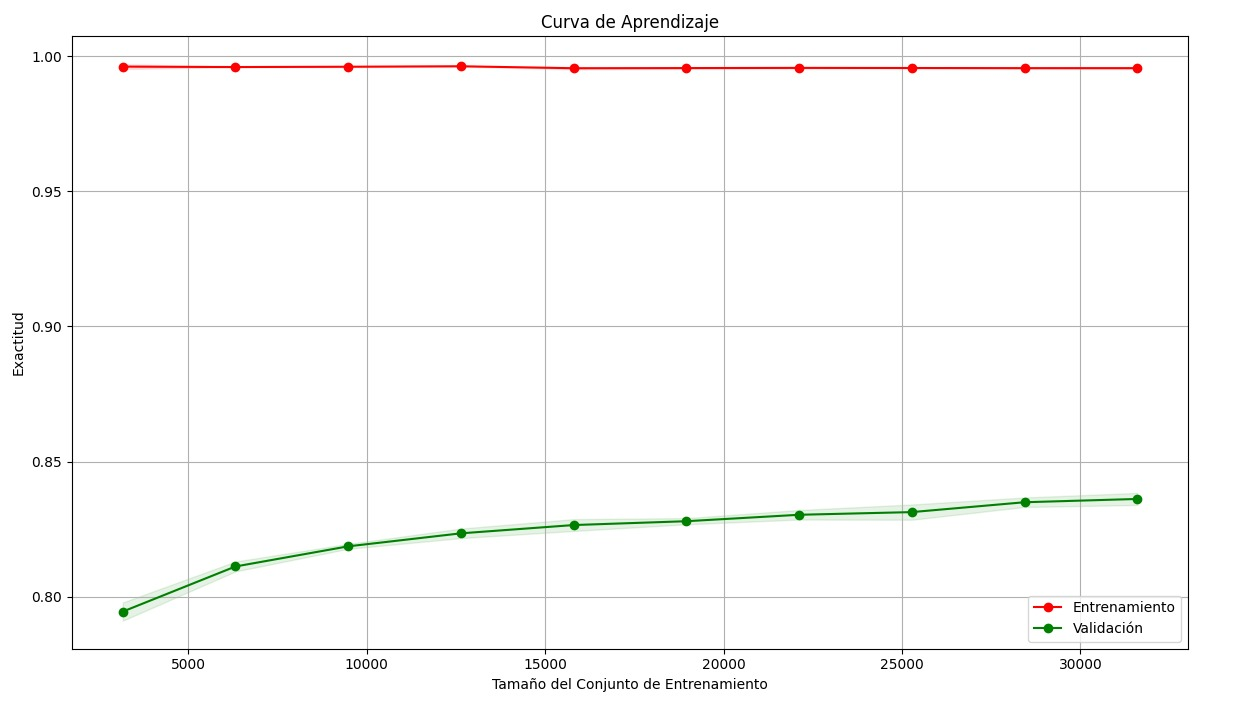



In [ ]:
#CODIGO DE LA CURVA DE APRENDIZAJE DE ARRIBA:
"""
import pandas as pd
import chardet
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Cargar los datos nuevamente, para tener los datos nuevamente
with open("Odioesptrabajado.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
df = pd.read_csv('Odioesptrabajado.csv',encoding=encoding)

#Eliminar posibles valores nulos en la columna que nos interesa clasificar
df = df.dropna(subset=['text_preprocessed'])

#Vectorización de texto utilizando TF-IDF, esto lo hicimos en la parte de prreprocesamiento, pero lo volvemos a hacer por si pasó algo al recargar
#la base de datos, mejor asegurarse
vectorizer = TfidfVectorizer()
#dividimos las dos variables, la variable x que es la columna de texto preprocesada después de vectorizar
X = vectorizer.fit_transform(df['text_preprocessed'])
#y la columna objetivo que es la columna target
y = df['target']

#Dividir los datos en conjuntos de entrenamiento y prueba
#Se tomó aleatoriamente el 20% de la columna test y el resto para el train, tomando un 80% trtain a 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=170119)

#Intanciamos el modelo de clasificación con random forest, pero ahora usando únicamente lo que fueron los mejores hiperparámetros
#junto con la mejor semilla, lo que nos da como resutlado el MEJOR MODELO
best_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=150, random_state=170119)

#Calcular la curva de aprendizaje a partir de la métrica de accuracy, para ver que tal el ajuste de los datos
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1)

#Calcular las medias y desviaciones estándar de los puntajes de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title('Curva de Aprendizaje')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Accuracy')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validación')
plt.legend(loc='best')
plt.show()
"""

La curva de aprendizaje de lo que fue considerado el mejor modelo, presenta un sobreajuste de los datos, esto es un problema puesto que al querer meter datos nuevos, nos vamos a enfrentar a un problema, puesto que estos no los va a clasificar de manera adecuada.

Pero como vimos, los modelos evaluados anteriormente donde no hicimos un ajuste en los hiperparámetros más allá de decir que se tome 100 árboles tienen casi la misma efectividad, teniendo un 83% en general, por lo que vamos a ver que tan bien se ajustan estos modelos a los datos, por lo que sólo debemos ver la semilla de reproducibilidad.

Veamos si el modelo que se consideró antes como el mejor, que era el modelo donde únicamente se tomaron 100 árboles con semilla 170119:

Curva de aprendizaje:
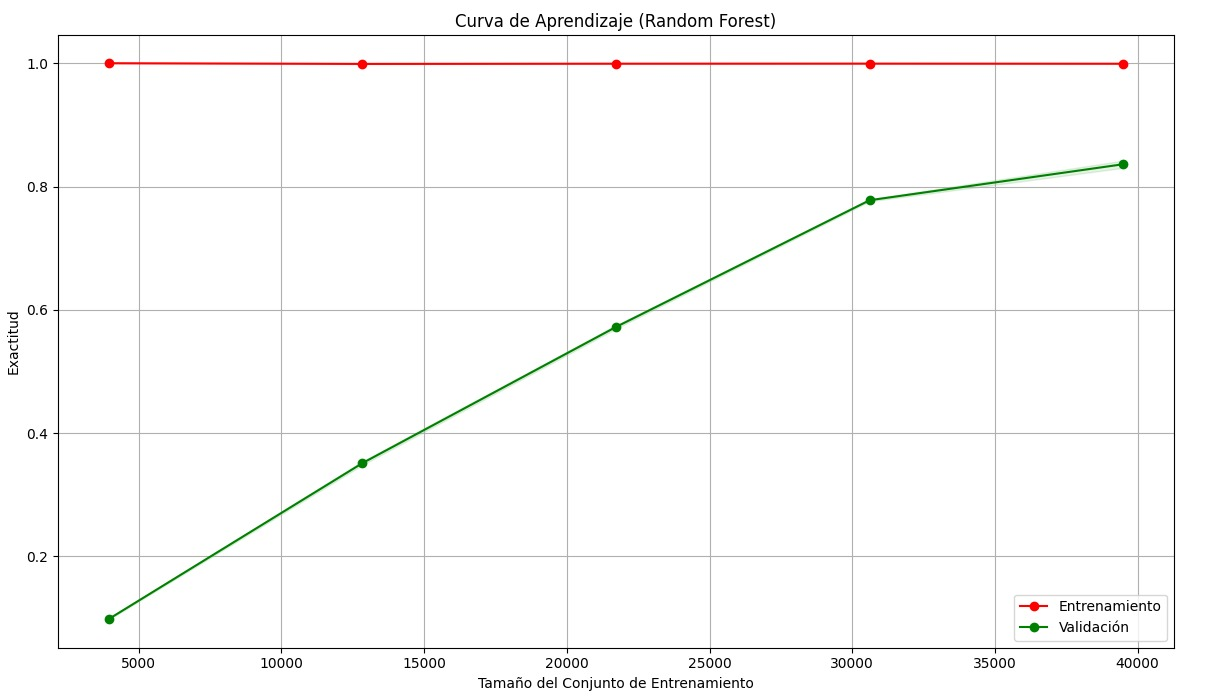

In [ ]:
#CÓDIGO DE ESTA CURVA Y DE LAS DEMÁS, DONDE ÚNICAMENTE SE IRÁ CAMBIANDO LA SEMILLA DE REPRODUCIBILIDAD
"""
import pandas as pd
from colorama import Fore
import chardet
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

#Cargar los datos nuevamente, para tener los datos nuevamente
with open("Odioesptrabajado.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
df = pd.read_csv('Odioesptrabajado.csv',encoding=encoding)

#Eliminar posibles valores nulos en la columna que nos interesa clasificar
df = df.dropna(subset=['text_preprocessed'])

#Vectorización de texto utilizando TF-IDF, esto lo hicimos en la parte de prreprocesamiento, pero lo volvemos a hacer por si pasó algo al recargar
#la base de datos, mejor asegurarse
vectorizer = TfidfVectorizer()
#dividimos las dos variables, la variable x que es la columna de texto preprocesada después de vectorizar
X = vectorizer.fit_transform(df['text_preprocessed'])
#y la columna objetivo que es la columna target
y = df['target']

#Dividir los datos en conjuntos de entrenamiento y prueba
#Se tomó aleatoriamente el 20% de la columna test y el resto para el train, tomando un 80% trtain a 20% test
#Aquí se cambia la semilla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123456789)

#Instanciar el modelo RandomForestClassifier, tomaremos 100 hiperparámetros que posteriormente podrían cambiar
#de momento vamos a hacer pruebas con esta información
#y aquí también se cambia la semilla
random_forest = RandomForestClassifier(n_estimators=100, random_state=123456789)

#Ajustar el modelo a los datos de entrenamiento, el modelo de randon_forest
random_forest.fit(X_train, y_train)

#Realizar predicciones en los datos de prueba a partir del modelo
y_pred = random_forest.predict(X_test)

#Generar la curva de aprendizaje, donde se usó la métrica de accuracy
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Exactitud")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación")

    plt.legend(loc="best")
    return plt

plot_learning_curve(random_forest, "Curva de Aprendizaje (Random Forest)", X, y, cv=5)
plt.show()

En este caso en la curva de enfriamiento se nos indica que al aumentar la cantidad de los datos, comienza a avanzar un poco la exactitud del modelo en cuanto a los datos de validación, lo que indica que el modelo ha reducido un poco el sobreajuste mientras se tengan más datos.

Veremos a continuación lo que ocurre en el modelo para la siguiente semilla de reproducibilidad que resultó ser la segunda mejor, la semilla 123456789:

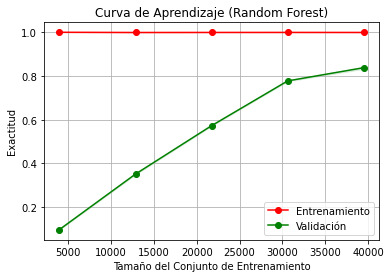

Como se puede apreciar, nuestro modelo aún presenta problemas de sobreajuste, de hecho, ambas curvas son casi identicas, por lo que puede ser un problema causado por otra razón, quizás la codificación,

Por último, vamos a ver que ocurre con el modelo de RandomForest con 100 árboles y semilla 2024:
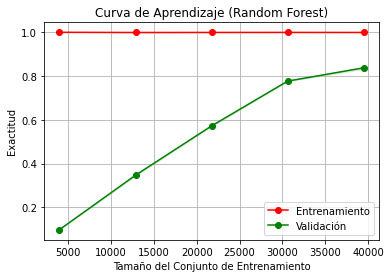

La curva se mantiene igual, sin importar la semilla, por lo que esto puede ser causado por una mala codificación, en estos momentos vamos a revisar cual pudo ser el problema, de igual forma veremos si podemos solucionar el gran sobreajuste que sufrió lo que se consideró como "El mejor modelo", resultado de los parámetros encontrados por el método GridSearchCV.

### 4.1.4 .- Solucionando el Sobreajuste


Revisión de las características más importantes:

Existen algunas características que son más importantes que otras para la clasificación de palabras, en este caso vamos a ver las primeras 20 para poder observar si hay algunas que no se vean tan importantes y poder quitar esta información

En la primera gráfica podemos ver que las 20 más importantes son estas:

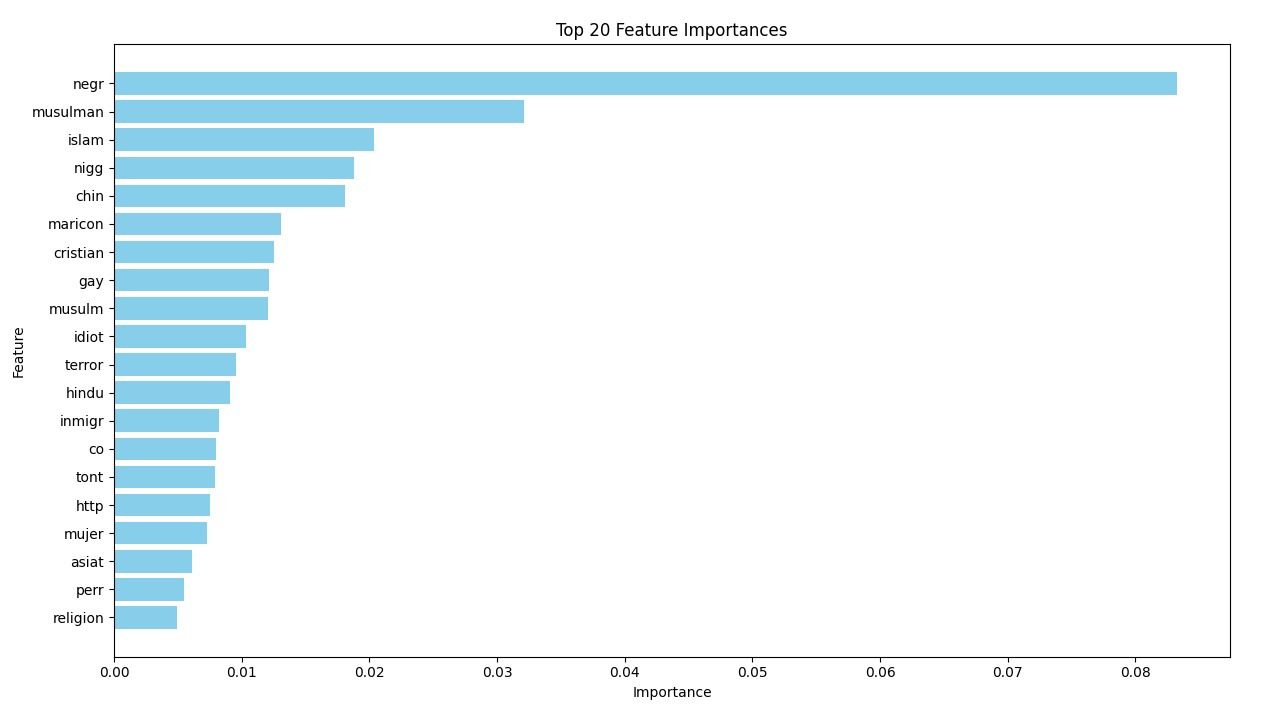

Vemos que aparecen palabras como "Co" y "http", estas palabras las vamos a retirar y volveremos a hacer la extracción de características importantes para observar si no hay otras que cumplan con estas características:

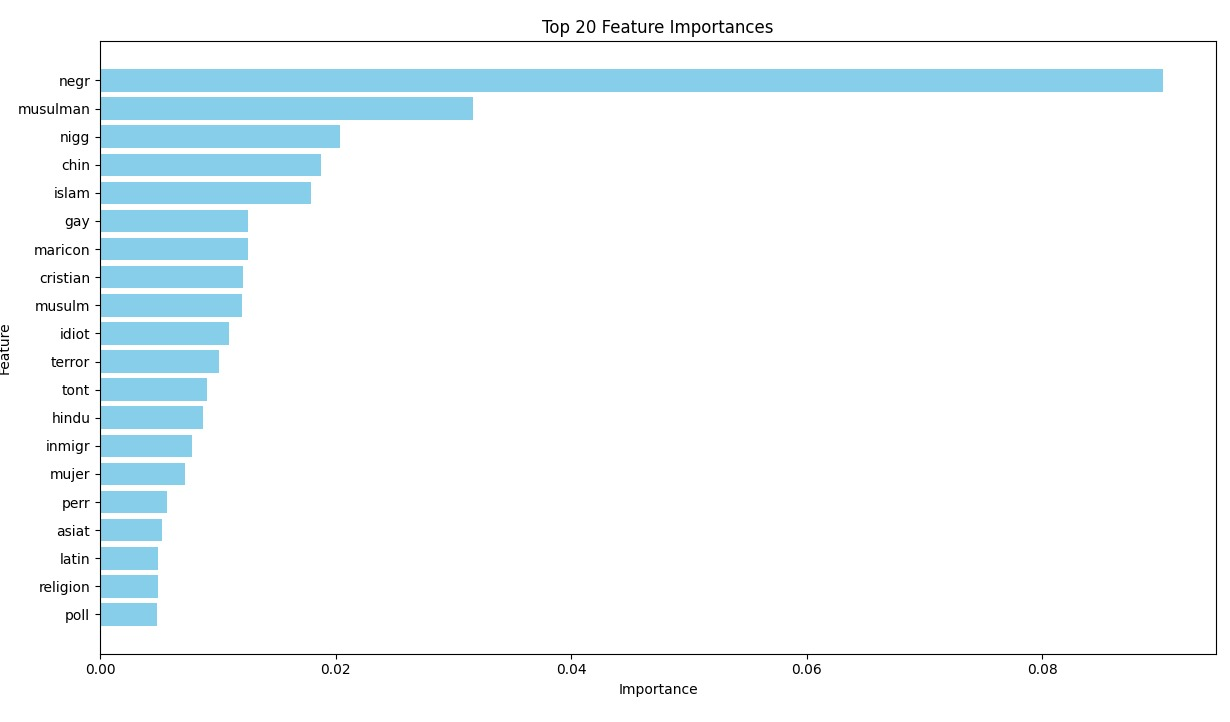

Ya sin estas palabras, no observamos alguna otra que pueda ser cumplir con ser influyente en la evaluación y al mismo tiempo no brindar información suficiente, por lo que vamos a evaluar el modelo con esta información, usando el considerado "Mejor Modelo".

In [ ]:
import pandas as pd
from colorama import Fore
import chardet
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#Cargar los datos nuevamente, para tener los datos actualizados y sin problemas
with open("Odioesptrabajado.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
df = pd.read_csv('Odioesptrabajado.csv', encoding=encoding)

#Eliminar posibles valores nulos en la columna que nos interesa clasificar
df = df.dropna(subset=['text_preprocessed'])

#Preprocesamiento del texto: eliminar palabras "co" y "http" en la columna de text_preprocessed, estas palabras deben ser retiradas por las razones que vimos arriba
#puede ser que se eliminen otras
df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in ('co', 'http')]))

#Vectorización de texto utilizando TF-IDF nuevamente para el valor de las características, la columna text_preprocessed
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text_preprocessed'])
#definimos el objetivo, la columna target
y = df['target']

#Dividir los datos en conjuntos de entrenamiento y prueba, tomando 80 de train y 20 de test, con semilla 170119
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=170119)

#crear el modelo de clasificación con RandomForest utilizando los mejores hiperparámetros, es decir, el mejor modelo
best_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=150, random_state=170119)

#Entrenar el modelo
best_model.fit(X_train, y_train)

#Realizar predicciones en los datos de prueba a partir del modelo
y_pred = best_model.predict(X_test)


#Calculamos las métricas de evaluación del modelo, usando average weighted
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

#Mostrar métricas de evaluación
#Metricas de evaluación para el modelo de random forest
print(Fore.BLUE + "Metricas de evaluación para el modelo de Random Forest")
print(Fore.GREEN + "\nAccuracy:", accuracy)
print(Fore.CYAN + "\nPrecision:", precision)
print(Fore.MAGENTA + "\nRecall:", recall)
print(Fore.YELLOW + "\nF1 Score:", f1)

#Calculando la accuracy con 5 de crossvalidation a ver si mejora
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

#Accuracy para el método de random forest con 5 de crossvalidation
print(Fore.WHITE + "\nAccuracy para el modelo de Random Forest con 5 de Cross Validation")
print(Fore.RED + "\nAccuracy con validación cruzada (5-fold):", cv_scores.mean())

#Además, vamos a mostrar la eficiencia de clasificación con la métrica de precisión para cada una de las categorías
#Calcular la precisión por clase
precisionporclase = precision_score(y_test, y_pred, average=None)

#tomamos los nombres de las diferentes categorías usando la función unique, esta es para quitar duplicados, pero se puede usar para esto
categorias = df['target'].unique()
for categoria in categorias:
    print(Fore.GREEN + categoria)

#Mostrar la precisión para cada una de las clases
print(Fore.BLUE + "\nPrecisión por clase:")
#iteramos en cada una de las precisiones que se calcularon, un total de 6
for i in range(len(precisionporclase)):
  #imprimimos el nombre de la categoría además de la precisión obtenida
    print(Fore.GREEN + f"{categorias[i]}: {precisionporclase[i]}")


Sin estas palabras la precisión del modelo se mantuvo como:

Metricas de evaluación para el modelo de Random Forest

Accuracy: 0.8362365809195867

Precision: 0.8310456789082438

Recall: 0.8362365809195867

F1 Score: 0.8302487115479382

Accuracy para el modelo de Random Forest con 5 de Cross Validation

Accuracy con validación cruzada (5-fold): 0.8374924042941057

Precisión por clase:

Sexismo: 0.7498829039812647

No odio: 0.8210262828535669

Origen: 0.8749377179870453

Racista: 0.8848341232227488

Religion: 0.8975183823529411

Orientacion: 0.6553323029366306

Podemos ver que las métricas tienen casi el mismo porcentaje de siempre, por lo que las palabras retiradas no influyeron en la capacidad de clasificación del modelo.

Veamos la curva de aprendizaje:

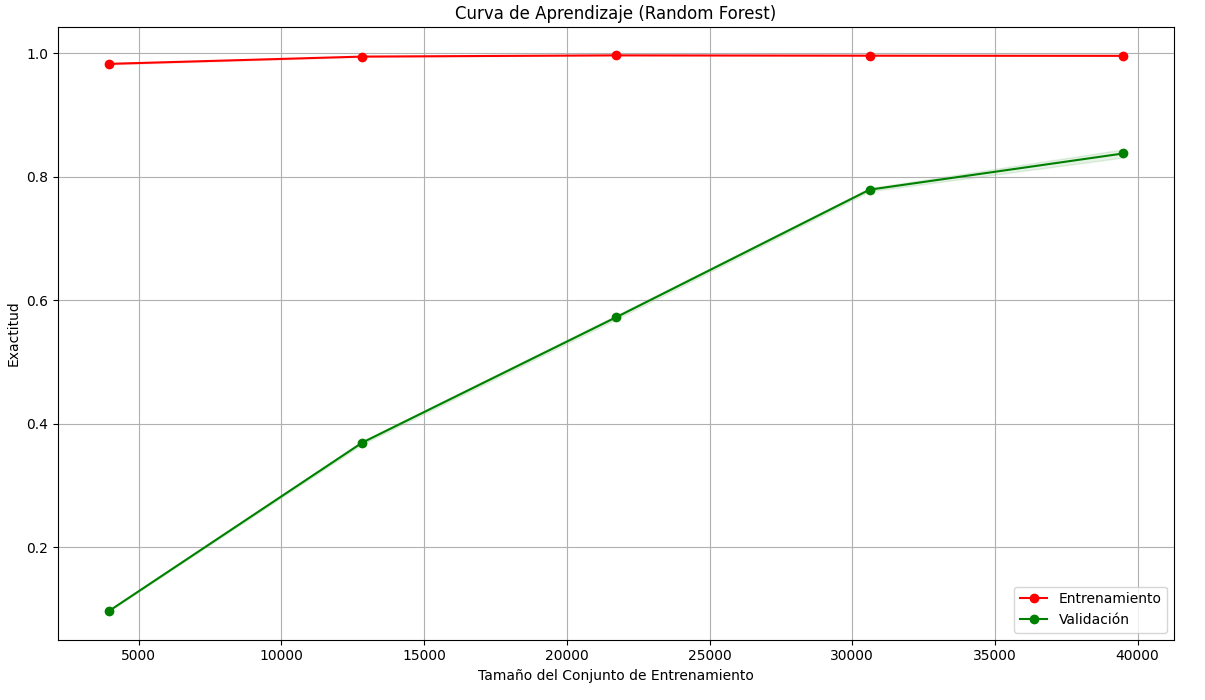

La curva de aprendizaje de los mejores parámetros es parecida a las de los modelos con únicamente 100 de árboles, lo que quiere decir que está menos sobre ajustada, pero si podemos notar, cuando eran 150 árboles y los mejores hiperparámetros el modelo estaba demasiado sobreajustado, por lo que vamos a intentar ver que ocurre cuando sólo son 100 árboles, quizás así el modelo pueda mejorar un poco.


In [ ]:
#CÓDIGO DE LA CURVA DE APRENDIZAJE DEL MEJOR MODELO SIN LAS PALABRAS
"""
import pandas as pd
from colorama import Fore
import chardet
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer



#Cargar los datos nuevamente, para tener los datos actualizados y sin problemas
with open("Odioesptrabajado.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
df = pd.read_csv('Odioesptrabajado.csv', encoding=encoding)

#Eliminar posibles valores nulos en la columna que nos interesa clasificar
df = df.dropna(subset=['text_preprocessed'])

#Preprocesamiento del texto: eliminar palabras "co" y "http" en la columna de text_preprocessed, estas palabras deben ser retiradas por las razones que vimos arriba
#puede ser que se eliminen otras
df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in ('co', 'http')]))

#Vectorización de texto utilizando TF-IDF nuevamente para el valor de las características, la columna text_preprocessed
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text_preprocessed'])
#definimos el objetivo, la columna target
y = df['target']

#Dividir los datos en conjuntos de entrenamiento y prueba, tomando 80 de train y 20 de test, con semilla 170119
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=170119)

#crear el modelo de clasificación con RandomForest utilizando los mejores hiperparámetros, es decir, el mejor modelo
best_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=150, random_state=170119)

#Entrenar el modelo
best_model.fit(X_train, y_train)

#curva de aprendizaje
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Exactitud")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación")

    plt.legend(loc="best")
    return plt

plot_learning_curve(best_model, "Curva de Aprendizaje (Random Forest)", X, y, cv=5)
plt.show()

Bajando la cantidad de árboles:

Parte de lo que hemos hecho nos ha mostrado que al tomar 150 árboles el modelo está muy ajustado, y al usar 100 el conjunto de prueba comienza a ajustar mejor, por lo que vamos a probar que pasa si bajamos aún más la cantidad de árboles, tomando sólo 100 árboles para el modelo con semilla 170119 y con los mejores hiperparámetros, además de quitar las palabras ya mencionadas. Los resultados de las métricas son los siguientes:
(El código es igual al de arriba, pero únicamente cambiamos el valor de n_estimators por 100)

Metricas de evaluación para el modelo de Random Forest

Accuracy: 0.8356289244480454

Precision: 0.832140398623794

Recall: 0.8356289244480454

F1 Score: 0.8295264913089667

Accuracy para el modelo de Random Forest con 5 de Cross Validation

Accuracy con validación cruzada (5-fold): 0.83246911079603

Precisión por clase:       

Sexismo: 0.7198257080610022

No odio: 0.8121212121212121

Origen: 0.8921267893660532

Racista: 0.8910411622276029

Religion: 0.91359177954227

Orientacion: 0.6554054054054054

Podemos ver que las métricas son casi identicas a las anteriores, si bien la efectividad baja un poco, la diferencia es realmente casi nula, por lo que este modelo también puede funcionar.

Ahora veamos si no está sobreajustado:

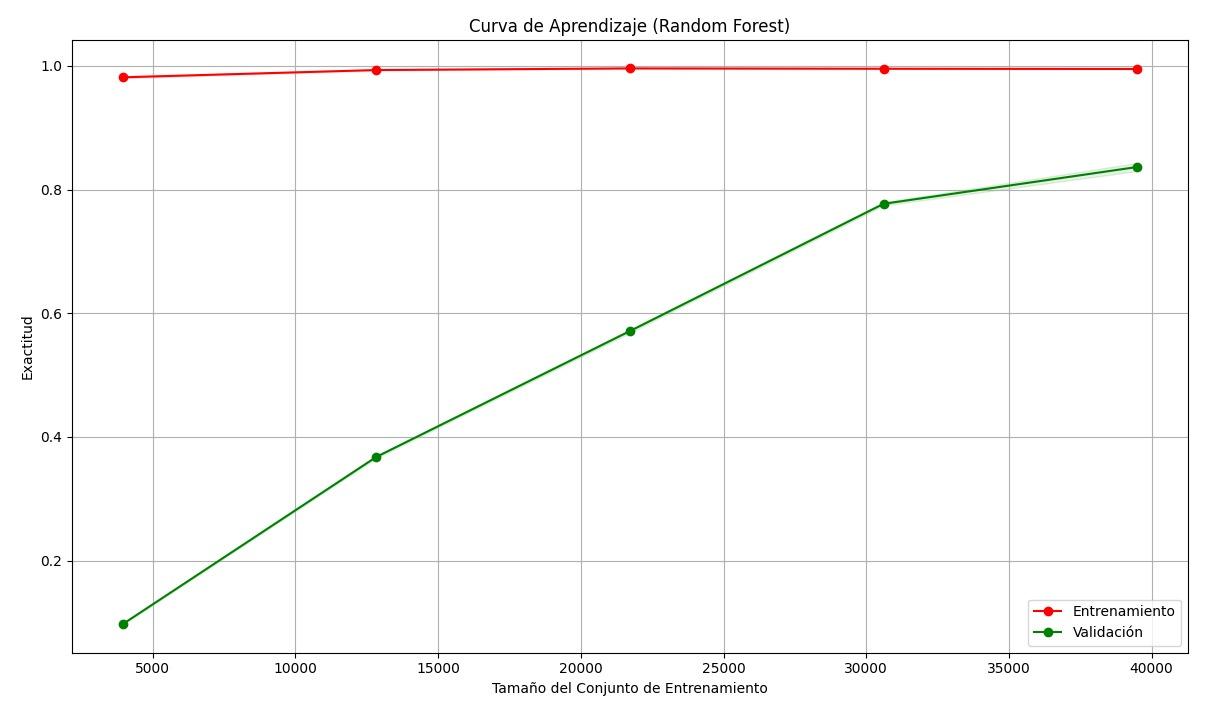

El modelo parece estar aún sobreajustado, pedo podemos ver que la gráfica del conjunto de entrenamiento comienza un poco más abajo, quizás bajar la cantidad de árboles pueda hacer que mejore aún más.



Como último intento de poder mejorar este modelo quitando el sobreajuste, vamos a usar el Mejor Modelo, con sólo 50 árboles, y quitando las palabras mencionadas, sus métricas fueron las siguientes:

Metricas de evaluación para el modelo de Random Forest

Accuracy: 0.8345148875835527

Precision: 0.8289997862127425

Recall: 0.8345148875835527

F1 Score: 0.8282164585232468

Accuracy para el modelo de Random Forest con 5 de Cross Validation

Accuracy con validación cruzada (5-fold): 0.8328539598946729

Precisión por clase:

Sexismo: 0.7508258612553091

No odio: 0.8193069306930693

Origen: 0.8734367183591796

Racista: 0.8822421102213849

Religion: 0.8896991795806746

Orientacion: 0.659270998415214

En este caso las métricas si han tenido menor porcentaje, no es un cambio muy grande, pero si resulta ser un poco peor, aún con esto, el modelo tiene una buena calidad, y debemos ver el sobreajuste:

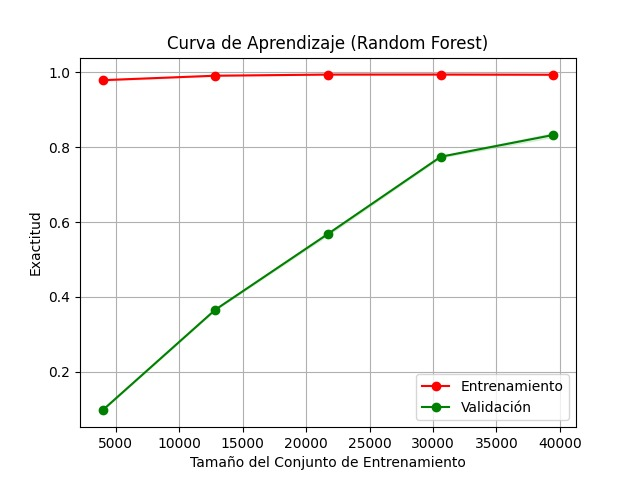

Los datos siguen sobreajustados, por lo que el camino para quitar el sobreajuste no se debe a la cantidad de árboles o los hiperparámetros, podemos buscar información sobre otra forma de bajar el sobreajuste.

### 4.1.5 .- Conclusiones sobre Random Forest

Realmente el problema de lo que parecería ser un sobreajuste nos indica que deberíamos apliar la cantidad de datos para mejorar nuestro modelo, y realmente no hay un sobreajuste tan grande con los últimos modelos vistos que nos puedan causar problemas para el modelo en sí al evaluar otros datos, con esto en mente, vamos a conservar un modelo en específico que pareció presentar los mejores resultados en cada una de las métricas, el cual fue:

Mejor Modelo, con los hiperparámetros seleccionados, con 100 árboles, semilla 170119 y sin las palabras que no aportaron información, donde se obtuvo lo siguiente:

Metricas de evaluación para el modelo de Random Forest

Accuracy: 0.8356289244480454

Precision: 0.832140398623794

Recall: 0.8356289244480454

F1 Score: 0.8295264913089667

Accuracy para el modelo de Random Forest con 5 de Cross Validation

Accuracy con validación cruzada (5-fold): 0.83246911079603

Precisión por clase:       

Sexismo: 0.7198257080610022

No odio: 0.8121212121212121

Origen: 0.8921267893660532

Racista: 0.8910411622276029

Religion: 0.91359177954227

Orientacion: 0.6554054054054054


Además, la matriz de confusión presenta los siguientes resultados:

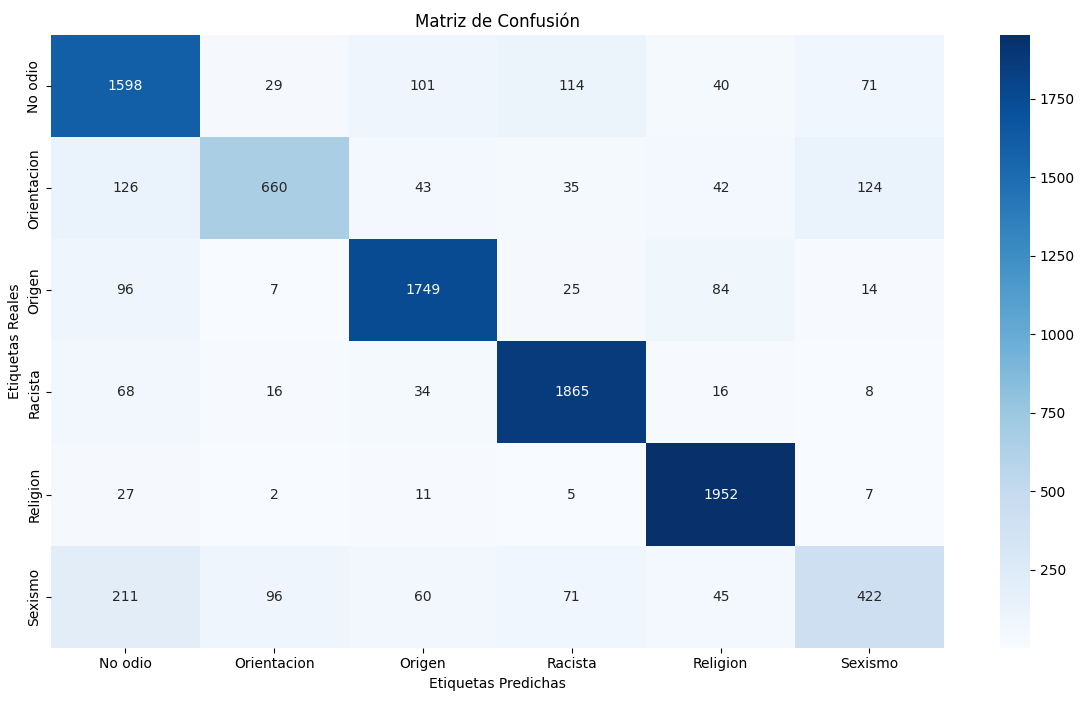

## Conclusión:

La matriz de confusión compara las etiquetas reales de los datos de prueba con las etiquedas predichas por el modelo, en la diagonal se encuentran las etiquetas que fueron predichas de manera correcta, fuera de la diagonal se encuentran las clasificaciones incorrectas.

Podemos ver que nuestro modelo resulto bien, puede agrupar correctamente muchos de los datos para muchas de las categorías a las que pertenece, en especial para no odio tenemos buena clasificación, que es algo que se espera del proyecto, que las personas que no colocan mensajes de odio no reciban una sanción por cosas que realmente no hicieron/dijeron, y en su mayoría, los datos de odio también tienen buena clasificación.

Los problemas podemos ver que surgen de la parte de la categoría Sexismo y orientacion, categorías las cuales curiosamente son las que menor cantidad de datos tienen, y al ver la curva de aprendizaje, pudimos ver que mientras mayor es la cantidad de datos, mejor se está ajustando el modelo, por lo que si nuestro intento de crear datos sintéticos hubiera funcionado, seguramente el modelo sería aún mejor, aún con esto, consideramos que el modelo es muy adecuado, excepto por estas dos categorías, y que para mejorarlo sólo habríamos de buscar agregar más datos, especialmente en las categorías mencionadas.

## Fuentes:

Baggs, B. M. (2021, November 15). Online hate speech rose 20\% during pandemic: “We’ve normalised it.” Online Hate Speech Rose 20\% During Pandemic: “We’ve
Normalised It.” https://www.bbc.com/news/newsbeat-59292509

Discurso de odio”. (s.f.). En Wikipedia. Recuperado el 18 de abril de 2024 de https://es.wikipedia.org/wiki/Discurso_de_odio

